In [ ]:
import requests
import json
from geojson import Point, Feature, FeatureCollection, dump


## OBS Daten von den jeweiligen Portalen (als geojson) exportieren

### Verfügbare Portale

* https://obs.adfc-brandenburg.de/
* https://obs.adfc-bw.de/
* https://obs.radentscheid-essen.de/
* https://portal.openbikesensor.org/
* https://obs.adfc-darmstadt.de/
* https://obs.adfc-osnabrueck.de/


* https://obs.adfc-ac.de/
* https://obs-portal.pub.solar/ (Köln)
* https://obs.adfc-luebeck.de/
* https://portal.1meter50.at/ (Österreich)
* https://portal.openbikesensor.hamburg 

In [175]:
portale_list= \
['https://obs.adfc-brandenburg.de/',
 'https://obs.adfc-bw.de/',
 'https://obs.radentscheid-essen.de/',
 'https://portal.openbikesensor.org/',
 'https://obs.adfc-darmstadt.de/',
 'https://obs.adfc-osnabrueck.de/',

 'https://obs.adfc-ac.de/',
 'https://obs-portal.pub.solar/',
'https://obs.adfc-luebeck.de/',
'https://portal.1meter50.at/',
'https://portal.openbikesensor.hamburg/' ]

In [176]:
#portale_list

In [266]:
#portale_list_str=[]
for p in portale_list:
    p_str=p.replace('https://','').replace('.de/','').replace('.org/','').replace('obs.','').replace('.pub.solar/','-koeln').replace('.','-').replace('/','')#.replace('-','_')
    print (p_str)
    #portale_list_str.append(p_str)

adfc-brandenburg
adfc-bw
radentscheid-essen
portal-openbikesensor
adfc-darmstadt
adfc-osnabrueck
adfc-ac
obs-portal-koeln
adfc-luebeck
portal-1meter50-at
portal-openbikesensor-hamburg


In [267]:
#portale_list_str_ = ', '.join([str(elem) for elem in portale_list_str])
#portale_list_str_

In [268]:
datum="230206"

for p in portale_list[-1:]:
    url = p + "api/export/events?bbox=-0.19922377649033446,58.13748613913617,20.921758549385075,43.25705589043925&fmt=geojson"  #einfach riesiege bbbox

    response = requests.request("GET", url)
    response_dict = json.loads(response.text)
    
    #p_str=p.replace('https://','').replace('.de/','').replace('.org/','').replace('obs.','').replace('.pub.solar/','-koeln')
    p_str=p.replace('https://','').replace('.de/','').replace('.org/','').replace('obs.','').replace('.pub.solar/','-koeln').replace('.','-').replace('/','')#.replace('-','_')

    with open('portale/'+datum+'_portalSnap_'+p_str+'.geojson', 'w') as f:
        dump(response_dict, f)

## Files einlesen

In [179]:
import glob
from tqdm import tqdm


In [180]:
files = glob.glob(r'portale\*.geojson')
len(files)

11

In [181]:
gdf =gpd.GeoDataFrame()

for f in tqdm(files):
    gdf_this = gpd.read_file(f, crs='EPSG:4326')
    portal_name=f.split('_')[-1].replace('.geojson','')
    datum_stand=f.split('_')[0].replace('portale\\','')
    
    gdf_this['portal']= portal_name

    gdf=gdf.append(gdf_this)
    
    print ("portal_name: " + portal_name)
    print ("Anzahl Datenpunkte: " + str(len(gdf_this)))
    print ("Stand vom: " + datum_stand)
    
                                        
print ("\nAnzahl Datenpunkte gesamt: "+ str(len(gdf)))

  0%|                                                                                    | 0/11 [00:00<?, ?it/s]

portal_name: adfc-ac
Anzahl Datenpunkte: 138
Stand vom: 230201


 18%|█████████████▊                                                              | 2/11 [00:01<00:07,  1.14it/s]

portal_name: adfc-brandenburg
Anzahl Datenpunkte: 16410
Stand vom: 230201


 27%|████████████████████▋                                                       | 3/11 [00:04<00:11,  1.45s/it]

portal_name: adfc-bw
Anzahl Datenpunkte: 25504
Stand vom: 230201


 36%|███████████████████████████▋                                                | 4/11 [00:06<00:12,  1.74s/it]

portal_name: adfc-darmstadt
Anzahl Datenpunkte: 21547
Stand vom: 230201


 45%|██████████████████████████████████▌                                         | 5/11 [00:06<00:07,  1.33s/it]

portal_name: adfc-luebeck
Anzahl Datenpunkte: 5580
Stand vom: 230201


 55%|█████████████████████████████████████████▍                                  | 6/11 [00:07<00:05,  1.15s/it]

portal_name: adfc-osnabrueck
Anzahl Datenpunkte: 7874
Stand vom: 230201


 64%|████████████████████████████████████████████████▎                           | 7/11 [00:08<00:04,  1.02s/it]

portal_name: obs-portal-koeln
Anzahl Datenpunkte: 6398
Stand vom: 230201


 73%|███████████████████████████████████████████████████████▎                    | 8/11 [00:08<00:02,  1.12it/s]

portal_name: portal-1meter50-at
Anzahl Datenpunkte: 4460
Stand vom: 230201


 82%|██████████████████████████████████████████████████████████████▏             | 9/11 [00:10<00:02,  1.10s/it]

portal_name: portal-openbikesensor-hamburg
Anzahl Datenpunkte: 15508
Stand vom: 230201


 91%|████████████████████████████████████████████████████████████████████▏      | 10/11 [00:15<00:02,  2.15s/it]

portal_name: portal-openbikesensor
Anzahl Datenpunkte: 45780
Stand vom: 230201


100%|███████████████████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.50s/it]

portal_name: radentscheid-essen
Anzahl Datenpunkte: 14294
Stand vom: 230201

Anzahl Datenpunkte gesamt: 163493


In [253]:
# Duplikate löschen, falls User Daten auf mehrere Portale geladen haben
gdf=gdf.drop_duplicates(subset=['distance_overtaker','time','geometry']).copy()
gdf

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal
0,1.74,NaN,1,38376065.0,4.203713,4.416667,2022-07-12 16:43:09+00:00,POINT (6.03870 50.78771),adfc-ac
1,1.57,NaN,1,38376065.0,4.210995,4.444444,2022-07-12 16:43:12+00:00,POINT (6.03861 50.78760),adfc-ac
2,1.72,1.80,1,NaN,4.876590,3.055556,2022-07-12 17:12:09+00:00,POINT (5.96262 50.79092),adfc-ac
3,NaN,1.11,1,NaN,4.901329,3.750000,2022-07-12 17:12:28+00:00,POINT (5.96278 50.79019),adfc-ac
4,2.14,NaN,1,NaN,4.879833,3.611111,2022-07-12 17:12:30+00:00,POINT (5.96280 50.79013),adfc-ac
...,...,...,...,...,...,...,...,...,...
14289,1.36,NaN,-1,26552983.0,1.377838,5.333333,2023-01-28 09:23:00+00:00,POINT (7.00358 51.43075),radentscheid-essen
14290,1.42,NaN,1,27301911.0,6.040355,6.500000,2023-01-28 09:32:29+00:00,POINT (7.02618 51.43727),radentscheid-essen
14291,0.80,2.23,1,28098293.0,5.883440,5.500000,2023-01-28 09:34:21+00:00,POINT (7.02992 51.43729),radentscheid-essen
14292,1.77,NaN,-1,28317753.0,0.364875,5.916667,2023-01-31 14:17:25+00:00,POINT (7.03141 51.44392),radentscheid-essen


In [251]:
import matplotlib.pyplot as plt
import contextily as ctx

In [260]:
#fig, ax = plt.subplots(figsize=(10, 10))
#gdf[::100].plot(ax=ax, column='portal', legend=True)
#
##bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
#bland.boundary.plot(ax=ax, color='gray')

In [269]:


# Function
def makeLayeredMap(*args):
    """This function accepts an arbitrary number of geodataframes, plots them on top of a Contextily basemap. 
    NOTE: Please edit the Plotting-section to specify parameters for the number of layers and the formatting of each layer.
    Output: Saved file and layered map for display."""
    
    # Convert the CRS for all layers to EPSG3857 to match Contextily
    args = list(map(lambda x: x.to_crs(epsg=3857), args))
    # Create figure
    fig, ax = plt.subplots(1, figsize=(15, 15))
    #Set aspect to equal
    ax.set_aspect('equal')
    
    
    
    # PLOTTING: Specify layers to plot how to format each layer (colours, transparency, etc.):
    # Layer 1:
    args[0].plot(ax=ax,facecolor="grey", alpha=0.2, figsize=(15,15))
    args[0].plot(ax=ax,facecolor="none", alpha=1, edgecolor='grey', linewidths=1, figsize=(15,15))
    # Layer 2:
    args[1].plot(ax=ax, alpha=0.2, zorder=2, markersize=6, column='portal', cmap='tab10', legend=True, legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5),"title":"OBS-Data from:"}) #color='#0069B4',   # , "opacity":1
    
    
    cmap2 = plt.cm.get_cmap(name='tab10')
    for count, legend_handle in enumerate(ax.get_legend().legendHandles):
        
        legend_handle._legmarker.set_markeredgewidth(3)
        legend_handle._legmarker.set_alpha(1)
        legend_handle._legmarker.set_color(cmap2(count))
    
    # Contextily basemap:
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron) 
    #ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, reset_extent=False, zoom = 10) 

    # Turn off axis
    ax.axis('off')
    
    ax.text(x=0.5, y=0.955, s='Measured overtaking events', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    #ax.text(x=0.5, y=0.92, s="OBS-Data: "+portale_list_str_+"ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=" + str(len(args[1])) + ", 2022-11-07)", fontsize=13, alpha=0.85, ha='center', va='bottom', transform=ax.transAxes)
    ax.text(x=0.5, y=0.93, s="(n=" + str(len(args[1])) + ", 2023-02-01)", fontsize=13, alpha=0.85, ha='center', va='bottom', transform=ax.transAxes)

    layered_map = plt.show()
    
    #fig.savefig("plots\OBS_analysis_map_Deutschland_80dpi.png", dpi=80)
    fig.savefig("plots\OBS_analysis_map_Deutschland_colored_80dpi.png", dpi=80, bbox_inches="tight") 
    return(layered_map)

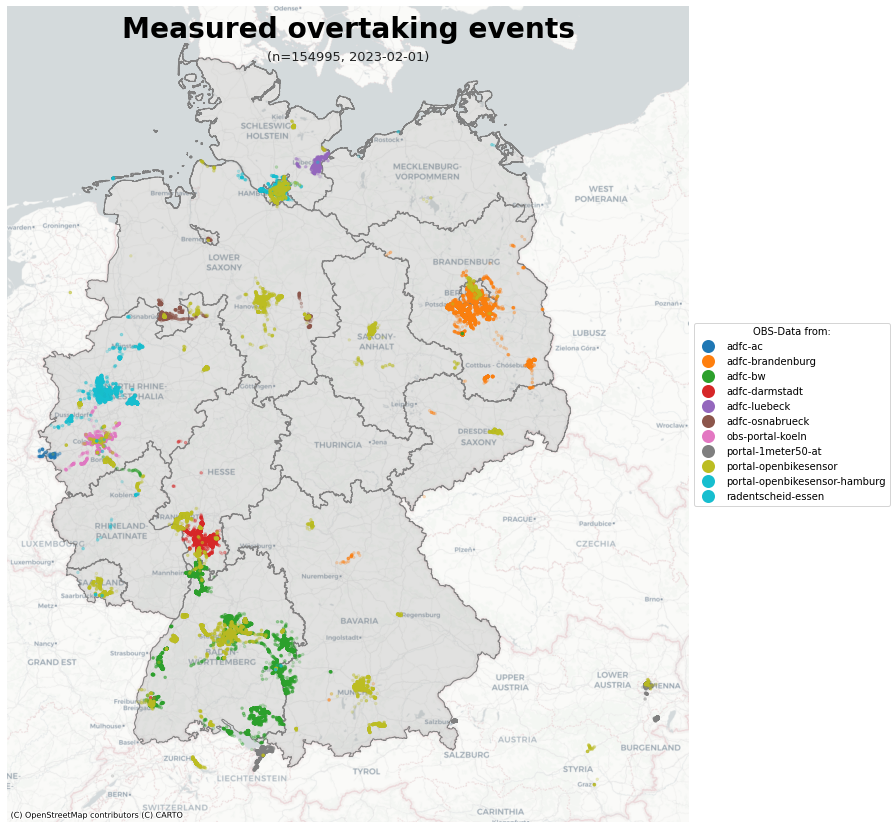

In [270]:
makeLayeredMap(bland,gdf)